In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

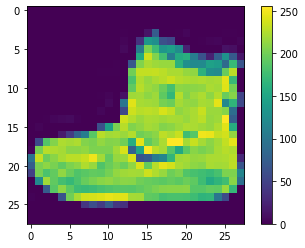

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

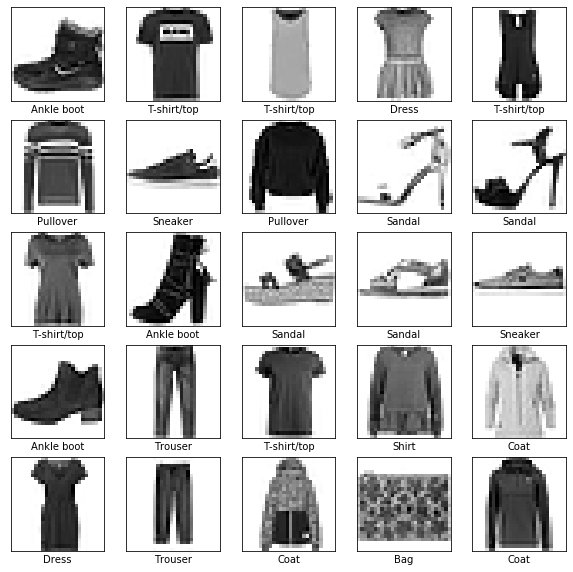

In [11]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [13]:
model.compile(optimizer = 'adam',
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.5000 - acc: 0.8237
Epoch 2/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3765 - acc: 0.8657
Epoch 3/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3373 - acc: 0.8768
Epoch 4/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3110 - acc: 0.8855
Epoch 5/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2951 - acc: 0.8913
Epoch 6/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2780 - acc: 0.8961
Epoch 7/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2664 - acc: 0.9012
Epoch 8/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2546 - acc: 0.9047
Epoch 9/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2467 - acc: 0.9082
Epoch 10/10
60000/60000 [==============================] -

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3378 - acc: 0.8811

Test accuracy: 0.8811


# Make predictions

In [16]:
probability_model = keras.Sequential([model,
                                     keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([5.0468003e-09, 1.0832297e-10, 5.6836012e-11, 3.9585444e-13,
       5.5466593e-11, 7.7884633e-04, 2.2269044e-09, 6.8254638e-03,
       4.9870805e-09, 9.9239576e-01], dtype=float32)

In [19]:
predictions.shape

(10000, 10)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

# Visualize 

In [22]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color = color)

In [23]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

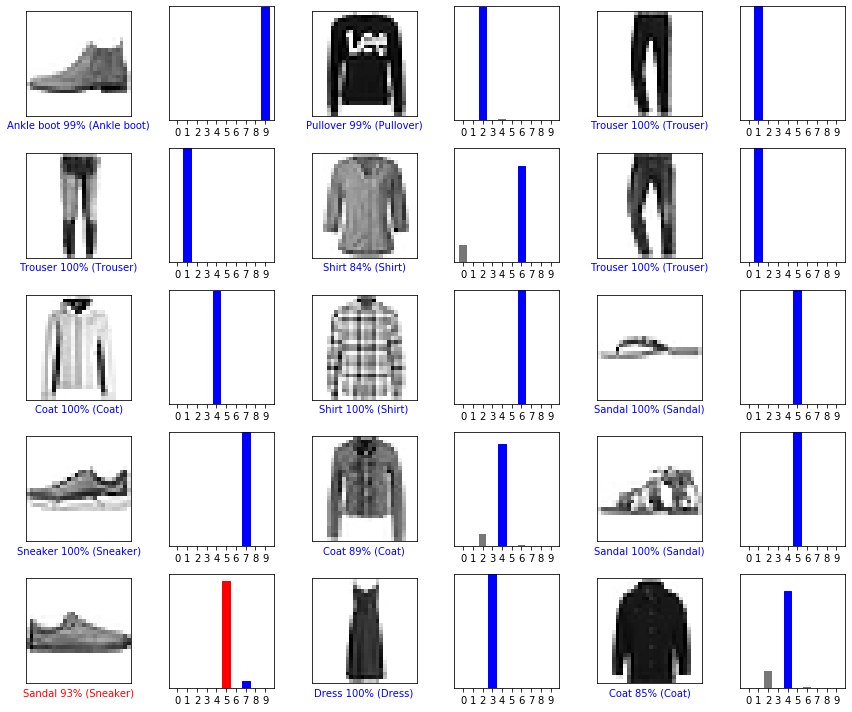

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Use the trained model

In [26]:
img = test_images[100]
img.shape

(28, 28)

In [27]:
img = (np.expand_dims(img, axis = 0))
img.shape

(1, 28, 28)

In [28]:
predictions_single = probability_model.predict(img)

In [29]:
print("Prediction: " + str(np.argmax(predictions_single)))
print("True label: " + str(test_labels[100]))

Prediction: 3
True label: 3
